In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
df = pd.read_csv("C:\\Users\\KGRCET\\Downloads\\heart\\heart_disease.csv")

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [33]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [21]:
df.fillna(df.mean(), inplace=True)

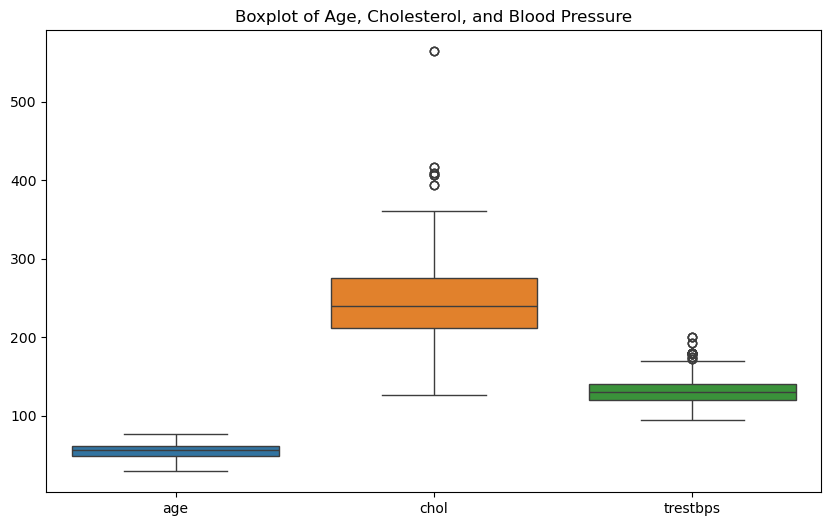

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'chol', 'trestbps']])
plt.title('Boxplot of Age, Cholesterol, and Blood Pressure')
plt.show()


In [29]:
df = df[(df['age'] > 20) & (df['age'] < 100)]

In [31]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.0

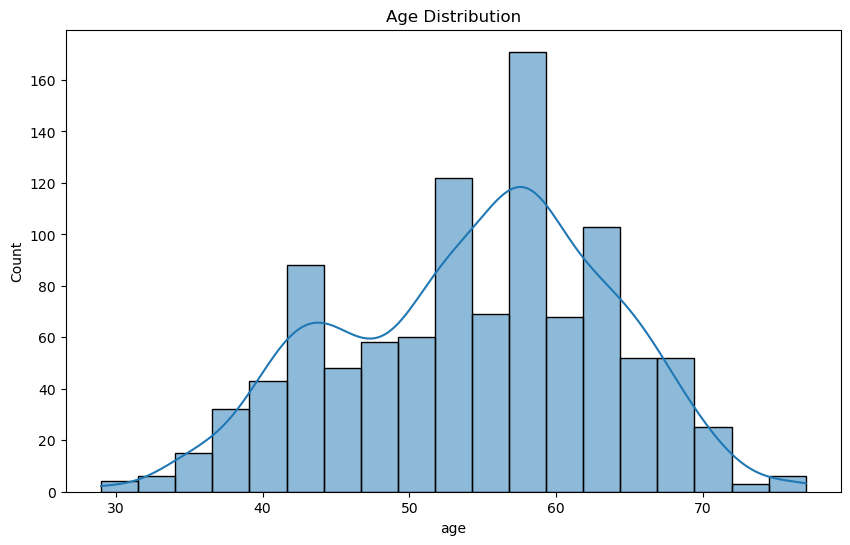

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

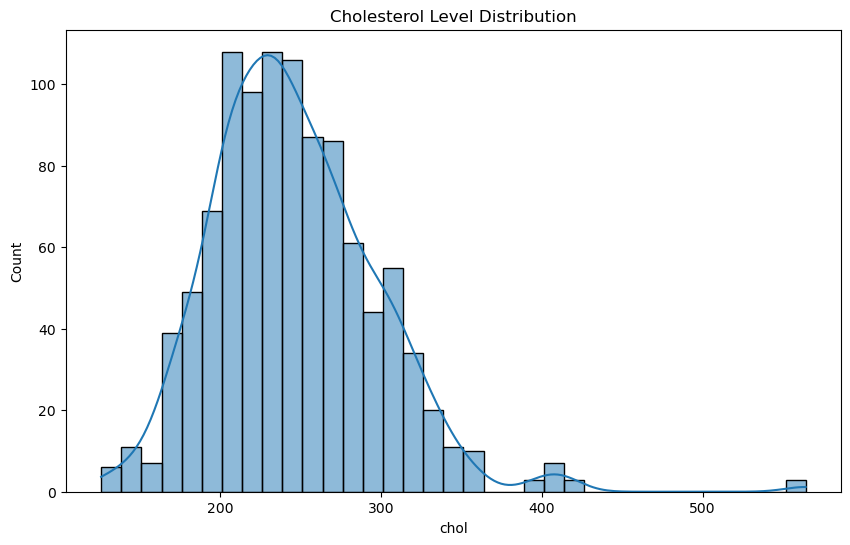

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True)
plt.title('Cholesterol Level Distribution')
plt.show()

<Figure size 1000x600 with 0 Axes>

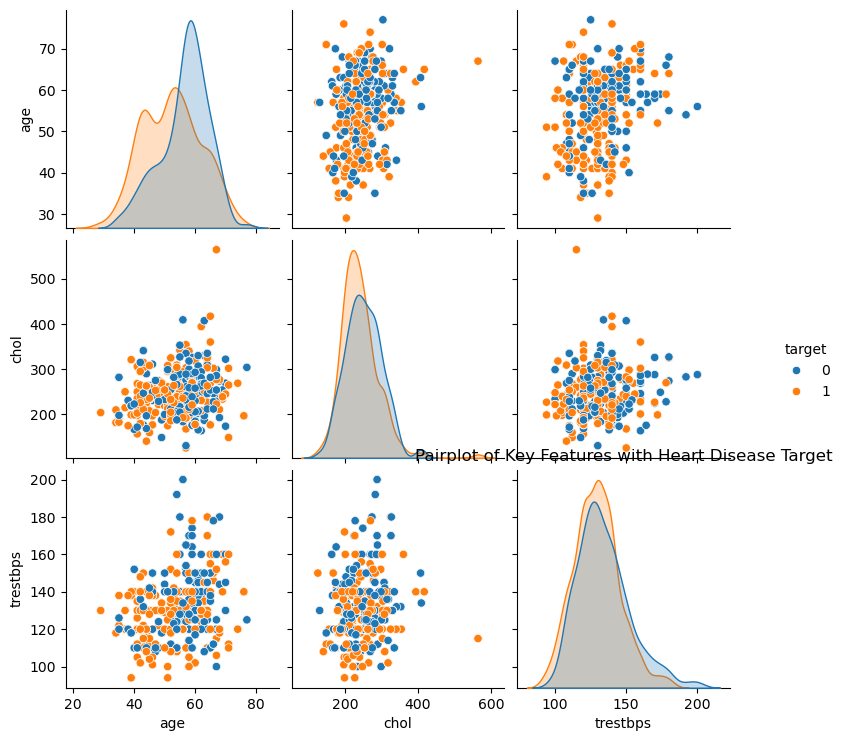

In [39]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[['age', 'chol', 'trestbps', 'target']], hue='target')
plt.title('Pairplot of Key Features with Heart Disease Target')
plt.show()

In [41]:
avg_age_heart_disease = df[df['target'] == 1]['age'].mean()
print(f"Average Age of Patients with Heart Disease: {avg_age_heart_disease:.2f}")

Average Age of Patients with Heart Disease: 52.41


In [43]:
heart_disease_percentage = (df['target'].sum() / len(df)) * 100
print(f"Percentage of People with Heart Disease: {heart_disease_percentage:.2f}%")

Percentage of People with Heart Disease: 51.32%


In [45]:
avg_cholesterol = df.groupby('target')['chol'].mean()
print("Average Cholesterol Levels for Heart Disease vs. No Heart Disease:")
print(avg_cholesterol)

Average Cholesterol Levels for Heart Disease vs. No Heart Disease:
target
0    251.292585
1    240.979087
Name: chol, dtype: float64


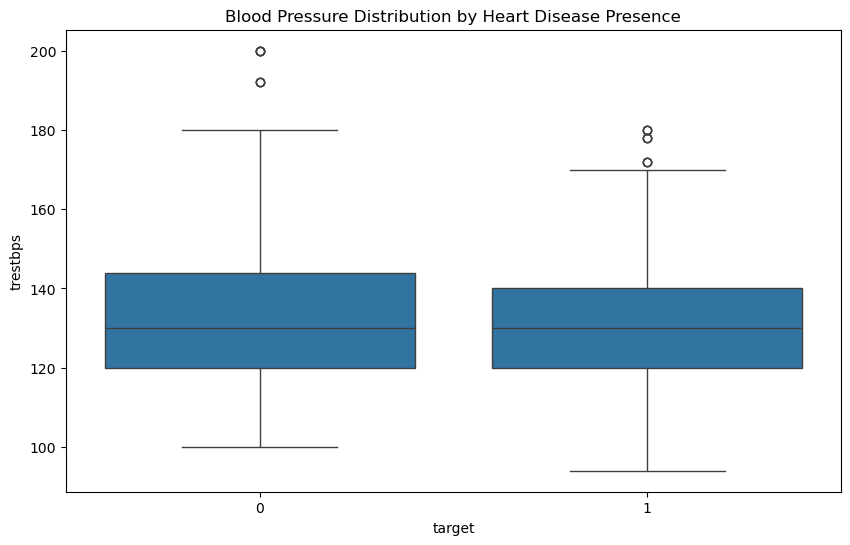

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Blood Pressure Distribution by Heart Disease Presence')
plt.show()

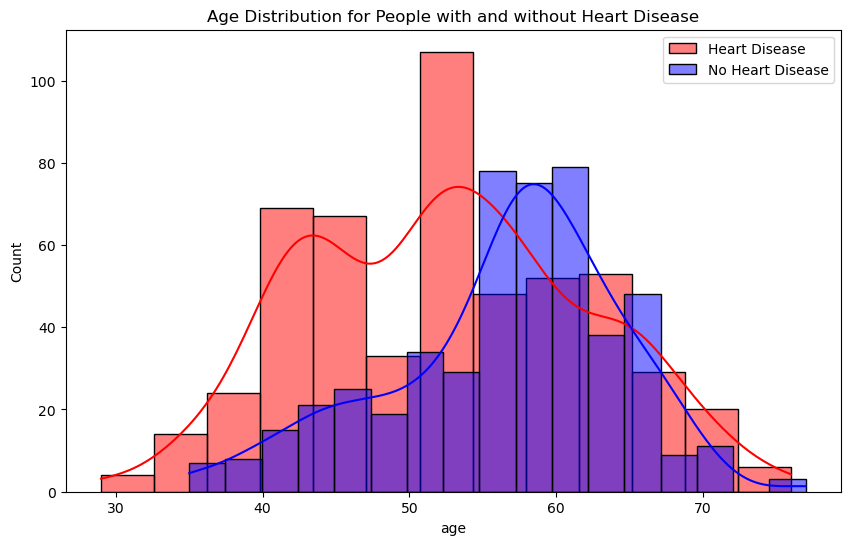

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['target'] == 1]['age'], color='red', label='Heart Disease', kde=True)
sns.histplot(df[df['target'] == 0]['age'], color='blue', label='No Heart Disease', kde=True)
plt.legend()
plt.title('Age Distribution for People with and without Heart Disease')
plt.show()

In [51]:
correlation = df[['chol', 'target']].corr()
print("Correlation between Cholesterol and Heart Disease:", correlation.loc['chol', 'target'])

Correlation between Cholesterol and Heart Disease: -0.09996559423254128


In [53]:
X = df.drop(columns=['target'])
y = df['target']
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [59]:
feature_importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_df)


Feature Importance:
     Feature  Importance
2         cp    0.134201
7    thalach    0.120473
11        ca    0.116755
9    oldpeak    0.116151
12      thal    0.097043
0        age    0.089313
4       chol    0.078930
3   trestbps    0.074253
8      exang    0.059592
10     slope    0.048738
1        sex    0.036057
6    restecg    0.019619
5        fbs    0.008874


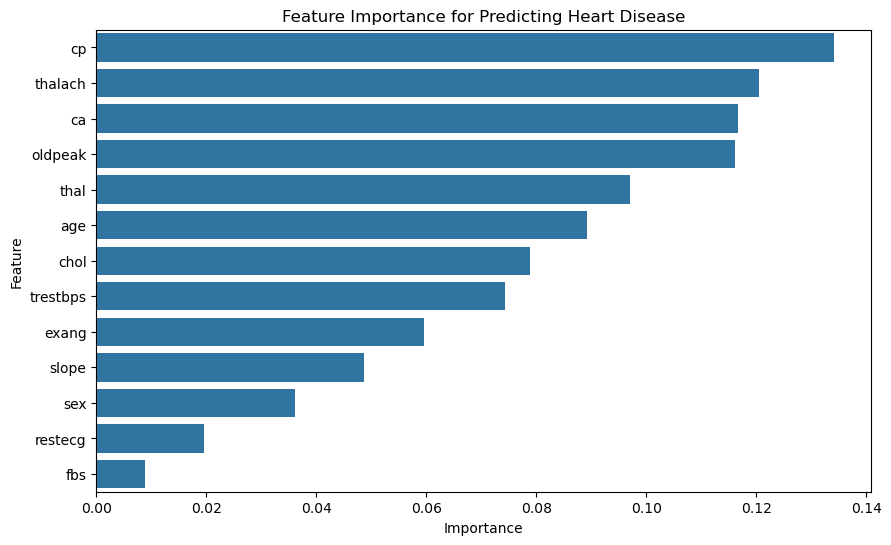

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance for Predicting Heart Disease')
plt.show()

In [63]:
age_groups = pd.cut(df['age'], bins=[20, 40, 60, 80, 100], labels=['20-40', '40-60', '60-80', '80+'])
df['age_group'] = age_groups

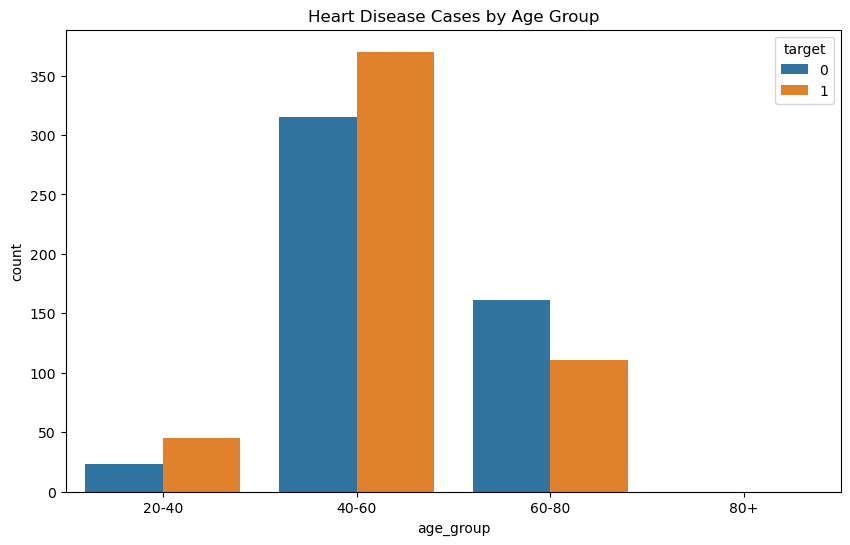

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='target', data=df)
plt.title('Heart Disease Cases by Age Group')
plt.show()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(y_test, y_pred))



Accuracy Score: 0.9853658536585366


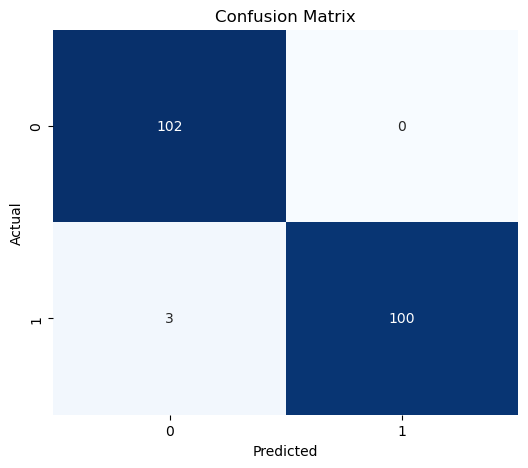

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [73]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))